In [1]:
from __future__ import division
import os
import numpy as np 
import pandas as pd
from helpers import data_provider
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# load the results csv
data = pd.read_csv('results_xgboost_regression.csv',index_col='House')
data = data.drop(['Unnamed: 0'],axis=1)
# load sociodempgraphics data
socio = pd.read_csv('sociodemographics.csv',index_col='House')
# make one datagframe
analysis = pd.concat([data,socio],axis=1)

In [6]:
load = pd.read_csv('clean_houses_95.csv',parse_dates=['Time'], index_col='Time')

In [7]:
averages = load.mean()

In [9]:
analysis['average'] = averages.values

## Analysis between number of residents

In [5]:
analysis.loc[(analysis['Number_of_residents'] == 2, 'Occupants>2')] = True
analysis.loc[(analysis['Number_of_residents'] > 2, 'Occupants>2')] = False

In [6]:
occ_2 = analysis[analysis['Occupants>2'] == True]['test_r_squared_adj']
occ_4 = analysis[analysis['Occupants>2'] == False]['test_r_squared_adj']

The t-test tests the hypothesis that two samples are significantly different. It returns a p-value that expresses the probability that this null hypothesis is wrong: 

H_null : Occ_2 = Occ_4

In [8]:
stats.ttest_ind(occ_2, occ_4)

Ttest_indResult(statistic=1.2648646110555188, pvalue=0.22656976543918306)

The p-value is large 23% that means that we cannot reject the jull hypothesis of equal averages.

In [9]:
occ_2 = analysis[analysis['Occupants>2'] == True]['test_mape']
occ_4 = analysis[analysis['Occupants>2'] == False]['test_mape']
stats.ttest_ind(occ_2, occ_4)

Ttest_indResult(statistic=-1.1277255373448309, pvalue=0.2783926916592499)

In [23]:
occ_2 = analysis[analysis['Occupants>2'] == True]['average']
occ_4 = analysis[analysis['Occupants>2'] == False]['average']
stats.ttest_ind(occ_2, occ_4)

Ttest_indResult(statistic=-0.90725244157037122, pvalue=0.37962470301146023)

In [33]:
analysis.loc[(analysis['Number_of_residents'] == 2, 'Occupants')] = "Equal two"
analysis.loc[(analysis['Number_of_residents'] > 2, 'Occupants')] = "Greater than two"

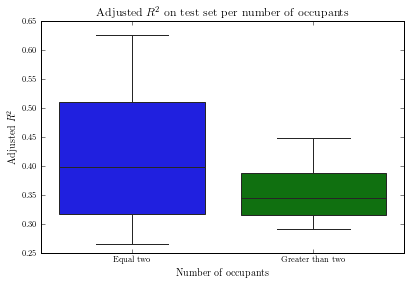

In [38]:
plt.figure(1)
sns.boxplot(x='Occupants', y='test_r_squared_adj',data=analysis)
plt.ylabel(r'Adjusted $R^2$')
plt.xlabel('Number of occupants')
plt.title(r'Adjusted $R^2$ on test set per number of occupants')
plt.savefig('figures/sociodemograhics/adj_rsquared_occupants.eps')
plt.savefig('figures/sociodemograhics/adj_rsquared_occupants.pdf')

## Analysis of occupant type

In [10]:
analysis.loc[(analysis['Resident_type'] == 'Pensioners', 'working_class')] = 'Pensioners'
analysis.loc[(analysis['Resident_type'] == 'Family', 'working_class')] = 'Family'
analysis.loc[(analysis['Resident_type'] == 'Working Couple', 'working_class')] = 'Working_couple'

In [12]:
pens = analysis[analysis['working_class'] == 'Pensioners']['test_r_squared_adj']
works = analysis[analysis['working_class'] == 'Working_couple']['test_r_squared_adj']
stats.ttest_ind(pens, works)

Ttest_indResult(statistic=-1.7510163713826126, pvalue=0.12340988353132498)

In [13]:
pens = analysis[analysis['working_class'] == 'Pensioners']['test_mape']
works = analysis[analysis['working_class'] == 'Working_couple']['test_mape']
stats.ttest_ind(pens, works)

Ttest_indResult(statistic=1.2973517318297738, pvalue=0.23562772800138659)

In [14]:
pens = analysis[analysis['working_class'] == 'Pensioners']['average']
works = analysis[analysis['working_class'] == 'Working_couple']['average']
stats.ttest_ind(pens, works)

Ttest_indResult(statistic=1.1446184676154505, pvalue=0.28999172349663044)

In [15]:
pens = analysis[analysis['working_class'] == 'Working_couple']['test_r_squared_adj']
works = analysis[analysis['working_class'] == 'Family']['test_r_squared_adj']
stats.ttest_ind(pens, works)

Ttest_indResult(statistic=2.1070852119917745, pvalue=0.056825208957830907)

In [16]:
pens = analysis[analysis['working_class'] == 'Working_couple']['test_mape']
works = analysis[analysis['working_class'] == 'Family']['test_mape']
stats.ttest_ind(pens, works)

Ttest_indResult(statistic=-1.8252062122277295, pvalue=0.092946786575367743)

In [17]:
pens = analysis[analysis['working_class'] == 'Working_couple']['average']
works = analysis[analysis['working_class'] == 'Family']['average']
stats.ttest_ind(pens, works)

Ttest_indResult(statistic=-1.4623613483337639, pvalue=0.16933359710290447)

In [18]:
pens = analysis[analysis['working_class'] == 'Pensioners']['test_r_squared_adj']
works = analysis[analysis['working_class'] == 'Family']['test_r_squared_adj']
stats.ttest_ind(pens, works)

Ttest_indResult(statistic=-0.42824968778409078, pvalue=0.67853546172604073)

In [19]:
pens = analysis[analysis['working_class'] == 'Pensioners']['test_mape']
works = analysis[analysis['working_class'] == 'Family']['test_mape']
stats.ttest_ind(pens, works)

Ttest_indResult(statistic=-0.13861024432869803, pvalue=0.89281003795122893)

In [20]:
pens = analysis[analysis['working_class'] == 'Pensioners']['average']
works = analysis[analysis['working_class'] == 'Family']['average']
stats.ttest_ind(pens, works)

Ttest_indResult(statistic=-0.24261061223203209, pvalue=0.8137456067394957)

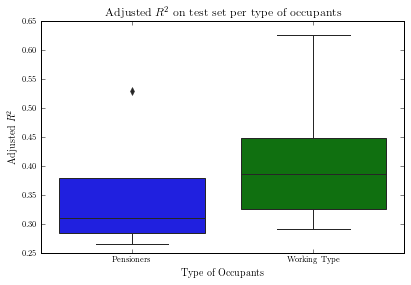

In [14]:
plt.figure(1)
sns.boxplot(x='working_class', y='test_r_squared_adj',data=analysis)
plt.ylabel(r'Adjusted $R^2$')
plt.xlabel('Type of Occupants')
plt.title(r'Adjusted $R^2$ on test set per type of occupants')
plt.savefig('figures/sociodemograhics/adj_rsquared_working.eps')
plt.savefig('figures/sociodemograhics/adj_rsquared_working.pdf')

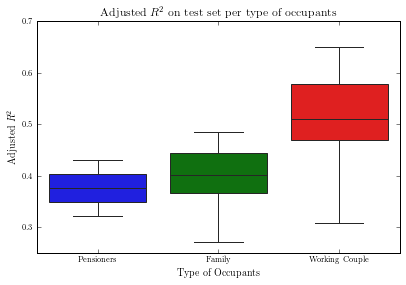

In [21]:
plt.figure(1)
sns.boxplot(x='Resident_type', y='test_r_squared_adj',data=analysis)
plt.ylabel(r'Adjusted $R^2$')
plt.xlabel('Type of Occupants')
plt.title(r'Adjusted $R^2$ on test set per type of occupants')
plt.savefig('figures/sociodemograhics/adj_rsquared_res_type.eps')
plt.savefig('figures/sociodemograhics/adj_rsquared_res_type.pdf')

## Analysis of bulding age

In [24]:
analysis.loc[(analysis['Building_age'] <50 , 'b_age')] = 'New'
analysis.loc[(analysis['Building_age'] > 50, 'b_age')] = 'Old'

In [25]:
new = analysis[analysis['b_age'] == 'New']['test_r_squared_adj']
old = analysis[analysis['b_age'] == 'Old']['test_r_squared_adj']
stats.ttest_ind(new, old)

Ttest_indResult(statistic=-0.38805836236729713, pvalue=0.70342456211830418)

In [26]:
occ_2 = analysis[analysis['b_age'] == 'New']['test_mape']
occ_4 = analysis[analysis['b_age'] == 'Old']['test_mape']
stats.ttest_ind(occ_2, occ_4)

Ttest_indResult(statistic=0.61311394402188391, pvalue=0.54898528386167289)

In [30]:
occ_2 = analysis[analysis['b_age'] == 'New']['average']
occ_4 = analysis[analysis['b_age'] == 'Old']['average']
stats.ttest_ind(occ_2, occ_4)

Ttest_indResult(statistic=0.62972474657504551, pvalue=0.53834917953524641)

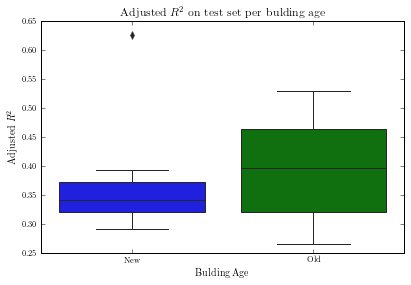

In [18]:
plt.figure(1)
sns.boxplot(x='b_age', y='test_r_squared_adj',data=analysis)
plt.ylabel(r'Adjusted $R^2$')
plt.xlabel('Bulding Age')
plt.title(r'Adjusted $R^2$ on test set per bulding age')
plt.savefig('figures/sociodemograhics/adj_rsquared_bage.eps')
plt.savefig('figures/sociodemograhics/adj_rsquared_bage.pdf')

## Analysis of appliances

In [19]:
analysis.Appliances.describe()

count    17.000000
mean     31.352941
std       9.727160
min      15.000000
25%      25.000000
50%      31.000000
75%      35.000000
max      49.000000
Name: Appliances, dtype: float64

In [40]:
analysis.loc[(analysis['Appliances'] <= 31 , 'num_app')] = 'Less than 31'
analysis.loc[(analysis['Appliances'] > 31, 'num_app')] = 'More than 31'

In [41]:
less = analysis[analysis['num_app'] == 'Less than 31']['test_r_squared_adj']
more = analysis[analysis['num_app'] == 'More than 31']['test_r_squared_adj']
stats.ttest_ind(more, less)

Ttest_indResult(statistic=1.2470253531011724, pvalue=0.23150898017906746)

In [42]:
less = analysis[analysis['num_app'] == 'Less than 31']['test_mape']
more = analysis[analysis['num_app'] == 'More than 31']['test_mape']
stats.ttest_ind(more, less)

Ttest_indResult(statistic=-1.4623554255228099, pvalue=0.16427904007785896)

In [43]:
less = analysis[analysis['num_app'] == 'Less than 31']['average']
more = analysis[analysis['num_app'] == 'More than 31']['average']
stats.ttest_ind(more, less)

Ttest_indResult(statistic=0.92886967591059477, pvalue=0.36766394319781537)

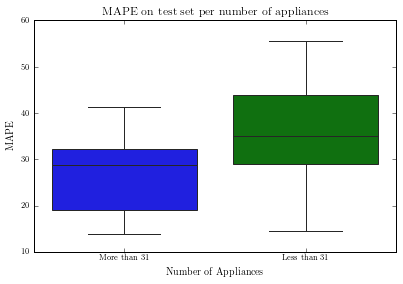

In [46]:
plt.figure(1)
sns.boxplot(x='num_app', y='test_mape',data=analysis)
plt.ylabel('MAPE')
plt.xlabel('Number of Appliances')
plt.title('MAPE on test set per number of appliances')
plt.savefig('figures/sociodemograhics/mape_apps.eps')
plt.savefig('figures/sociodemograhics/mape_apps.pdf')

## Number of bedrooms

In [36]:
analysis.loc[(analysis['Number_of_bedrooms'] <= 3 , 'num_bed')] = 'Less than 3'
analysis.loc[(analysis['Number_of_bedrooms'] > 3, 'num_bed')] = 'More than 3'

In [37]:
less = analysis[analysis['num_bed'] == 'Less than 3']['test_r_squared_adj']
more = analysis[analysis['num_bed'] == 'More than 3']['test_r_squared_adj']
stats.ttest_ind(more, less)

Ttest_indResult(statistic=-0.089596796146057159, pvalue=0.9297930197249854)

In [38]:
less = analysis[analysis['num_bed'] == 'Less than 3']['test_mape']
more = analysis[analysis['num_bed'] == 'More than 3']['test_mape']
stats.ttest_ind(more, less)

Ttest_indResult(statistic=-0.7549138482717267, pvalue=0.46198985691128402)

In [39]:
less = analysis[analysis['num_bed'] == 'Less than 3']['average']
more = analysis[analysis['num_bed'] == 'More than 3']['average']
stats.ttest_ind(more, less)

Ttest_indResult(statistic=1.0445433396873185, pvalue=0.31277625523249747)

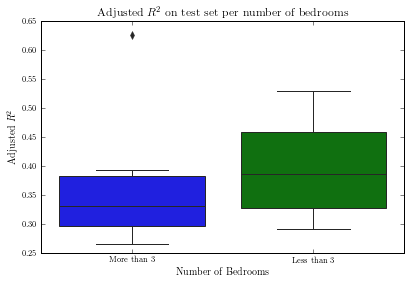

In [27]:
plt.figure(1)
sns.boxplot(x='num_bed', y='test_r_squared_adj',data=analysis)
plt.ylabel(r'Adjusted $R^2$')
plt.xlabel('Number of Bedrooms')
plt.title(r'Adjusted $R^2$ on test set per number of bedrooms')
plt.savefig('figures/sociodemograhics/adj_rsquared_beds.eps')
plt.savefig('figures/sociodemograhics/adj_rsquared_beds.pdf')

## Bulding Type

In [31]:
less = analysis[analysis['Bulding_type'] == 'Detached']['test_r_squared_adj']
more = analysis[analysis['Bulding_type'] == 'Semi-detached']['test_r_squared_adj']
stats.ttest_ind(more, less)

Ttest_indResult(statistic=-0.059825729342130915, pvalue=0.95308422343595989)

In [32]:
less = analysis[analysis['Bulding_type'] == 'Detached']['test_mape']
more = analysis[analysis['Bulding_type'] == 'Semi-detached']['test_mape']
stats.ttest_ind(more, less)

Ttest_indResult(statistic=-0.061864418433907789, pvalue=0.95148760669305943)

In [33]:
less = analysis[analysis['Bulding_type'] == 'Detached']['average']
more = analysis[analysis['Bulding_type'] == 'Semi-detached']['average']
stats.ttest_ind(more, less)

Ttest_indResult(statistic=-0.87954337420308393, pvalue=0.39297966341002877)

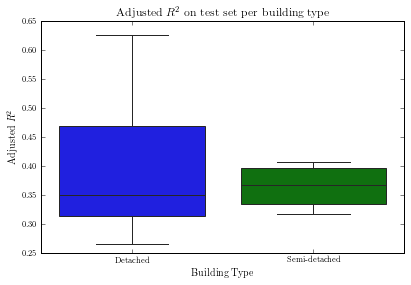

In [7]:
plt.figure(1)
sns.boxplot(x='Bulding_type', y='test_r_squared_adj',data=analysis)
plt.ylabel(r'Adjusted $R^2$')
plt.xlabel('Building Type')
plt.title(r'Adjusted $R^2$ on test set per building type')
plt.savefig('figures/sociodemograhics/adj_rsquared_btype.eps')
plt.savefig('figures/sociodemograhics/adj_rsquared_btype.pdf')